In [ ]:
%%capture
!pip install powerlaw

In [ ]:
import pandas as pd
import networkx as nx
from operator import itemgetter
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import community as community_louvain
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
nodes = pd.read_csv('/content/gdrive/MyDrive/PlayStore Data/Sampled Graph/SampledNodes.csv',encoding = 'utf-8')
edges = pd.read_csv('/content/gdrive/MyDrive/PlayStore Data/Sampled Graph/SampledEdges.csv',encoding = 'utf-8',sep='\t')

In [ ]:
len(nodes),len(edges)

(11453, 5048335)

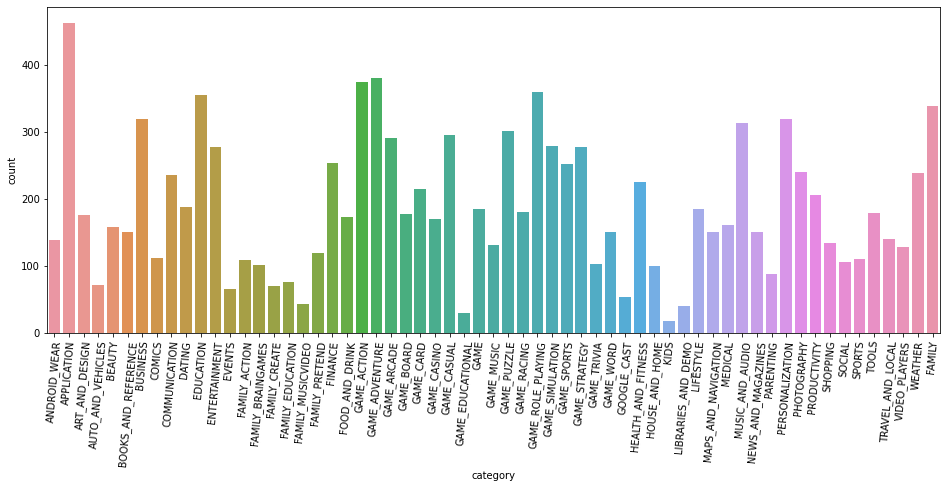

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x ='category', data = nodes);
plt.xticks(rotation=85);

In [ ]:
G = nx.from_pandas_edgelist(edges,'Source',"Target",["interaction"]) # create graph

In [ ]:
del edges

In [ ]:
nodeAttributes = ['price','scoreText','category']
for attribute in nodeAttributes:
  nx.set_node_attributes(G,dict(zip(nodes['appId'],nodes[attribute])),name = attribute)

In [ ]:
del nodes

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 11453
Number of edges: 5048335
Average degree: 881.5743


In [ ]:
nodes = pd.read_csv('/content/gdrive/MyDrive/PlayStore Data/WIP/wip_nodes.csv',encoding = 'utf-8')

In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.07697993887698297


In [ ]:
print(nx.is_connected(G))

True


In [ ]:
degree_centrality = dict(G.degree(G.nodes()))
sorted_degree = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 10 Apps by degree:")
for d in sorted_degree[:10]:
  print('App Id:',d[0])
  print('Degree:',d[1])
  for key,value in G.nodes[d[0]].items():
    print(key+":",value)
  print('-'*20)

nodes['degree'] = 0

for d in sorted_degree:
  appId = d[0]
  idx = list(nodes[nodes['appId'] ==  appId].index)[0]
  nodes.at[idx,'degree'] = d[1]
  
del degree_centrality,sorted_degree

Top 10 Apps by degree:
App Id: net.tsapps.appsales
Degree: 1914
price: 0.0
scoreText: 4.3
category: SHOPPING
--------------------
App Id: com.snapbreak.doors
Degree: 1885
price: 0.0
scoreText: 4.5
category: GAME_PUZZLE
--------------------
App Id: com.technologies.subtlelabs.doodhvale
Degree: 1883
price: 0.0
scoreText: 4.4
category: FOOD_AND_DRINK
--------------------
App Id: com.randomvideochat.livevideochat
Degree: 1848
price: 0.0
scoreText: 3.9
category: COMMUNICATION
--------------------
App Id: com.socialnetwork.metu
Degree: 1827
price: 0.0
scoreText: 3.9
category: SOCIAL
--------------------
App Id: imoblife.toolbox.full
Degree: 1822
price: 0.0
scoreText: 4.4
category: APPLICATION
--------------------
App Id: com.u2opia.woo
Degree: 1814
price: 0.0
scoreText: 4.2
category: APPLICATION
--------------------
App Id: com.apps2us.slither.slink.io
Degree: 1812
price: 0.0
scoreText: 4.0
category: GAME_ADVENTURE
--------------------
App Id: com.birthday.video.maker.photo.effect.video.make

Text(0, 0.5, 'Frequency')

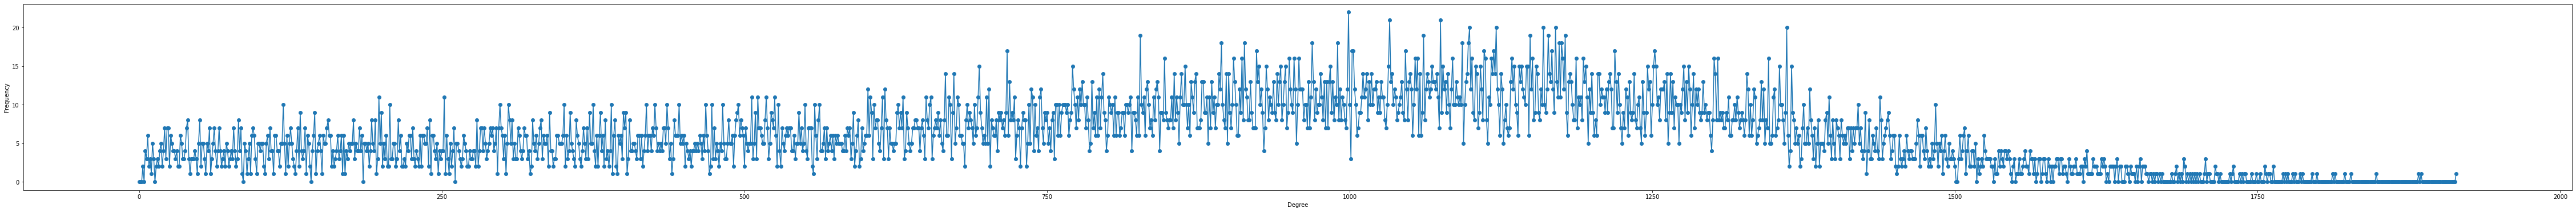

In [ ]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(80, 6)) 
plt.plot(degrees, degree_freq,'o-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

1.1516686758986223

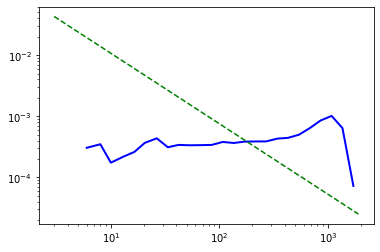

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test
fit = powerlaw.Fit(degree_sequence, xmin=1)
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2);
fit.alpha

In [ ]:
eigenvector = nx.eigenvector_centrality(G)
sorted_eigenvector = sorted(eigenvector.items(),key = itemgetter(1), reverse= True)
print("Top 10 Apps by eigenvector centrality:")
for e in sorted_eigenvector[:10]:
  print('App Id:',e[0])
  print('Eigenvector Centrality:',round(e[1],3))
  print('Degree:',G.degree(e[0]))
  for key,value in G.nodes[e[0]].items():
    print(key+":",value)
  print('-'*20)

nodes['eigenvector_centrality'] = 0.0

for e in sorted_eigenvector:
  appId = e[0]
  idx = list(nodes[nodes['appId'] ==  appId].index)[0]
  value = round(e[1],3)
  nodes.at[idx,'eigenvector_centrality'] = value

del eigenvector, sorted_eigenvector

Top 10 Apps by eigenvector centrality:
App Id: com.technologies.subtlelabs.doodhvale
Eigenvector Centrality: 0.02
Degree: 1883
price: 0.0
scoreText: 4.4
category: FOOD_AND_DRINK
--------------------
App Id: com.randomvideochat.livevideochat
Eigenvector Centrality: 0.019
Degree: 1848
price: 0.0
scoreText: 3.9
category: COMMUNICATION
--------------------
App Id: com.socialnetwork.metu
Eigenvector Centrality: 0.019
Degree: 1827
price: 0.0
scoreText: 3.9
category: SOCIAL
--------------------
App Id: com.u2opia.woo
Eigenvector Centrality: 0.019
Degree: 1814
price: 0.0
scoreText: 4.2
category: APPLICATION
--------------------
App Id: com.edudrive.exampur
Eigenvector Centrality: 0.018
Degree: 1787
price: 0.0
scoreText: 4.2
category: EDUCATION
--------------------
App Id: com.apps2us.slither.slink.io
Eigenvector Centrality: 0.018
Degree: 1812
price: 0.0
scoreText: 4.0
category: GAME_ADVENTURE
--------------------
App Id: com.adultemoji.sexy.stickers
Eigenvector Centrality: 0.018
Degree: 1775
p

In [ ]:
df = nodes.sort_values(by=['degree'])
df.head()

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
6238,Passport Size Photo Maker,passport.Size.Photo.Maker.Editor.Countries,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/s0fRW8Zw...,Crazy Softech,7840942704756122757,FREE,0.0,True,Passport Size Photo Maker is an app which supp...,0.0,0.000000,NaN,PRODUCTIVITY,0,1,1,3,0.0,0,0
5669,Mom or Dad Face App - Baby looks like dad or mom?,com.kiroglue.lookalikemomordadsimilarityparents,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/k_mIHkHL...,LinaSoft,LinaSoft,FREE,0.0,True,Best parents look app with ultimate face recog...,4.0,3.990000,NaN,PARENTING,0,0,1,3,0.0,0,0
8757,Photo Video Maker : MV Video Status Maker,com.photovideomaker.slideshow.videostatusmaker,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/Jwr8iK1b...,Pixel Creative Apps,Pixel+Creative+Apps,FREE,0.0,True,"Photo Video Maker is photo video, photo slides...",0.0,0.000000,NaN,FAMILY_MUSICVIDEO,0,0,0,5,0.0,1,0
10877,MA Notes: Medical Assistant's Pocket Guide,com.medpresso.Lonestar.manotes,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/4JlE1L9y...,Skyscape Medpresso Inc,8951910663104444856,FREE,0.0,True,MA Notes: Medical Assistant's Pocket Guide,4.6,4.600000,NaN,MEDICAL,0,0,0,5,0.0,1,2
10926,Certified Medical Assistant Study Notes Lite,com.tutioncentral.cmanoteslite,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/k7W15hEB...,Vapari Systems,5079879671770467624,FREE,0.0,True,Collection of 600 study notes for the CMA Medi...,4.6,4.571429,NaN,MEDICAL,0,0,0,5,0.0,1,2


### CNM

In [ ]:
communities = community.greedy_modularity_communities(G) # took 23m 52s

In [ ]:
nodes['greedy_communities'] = 0

In [ ]:
for i in range(len(communities)):
  for appId in communities[i]:
    idx = list(nodes[nodes['appId'] ==  appId].index)[0]
    nodes.at[idx,'greedy_communities'] = i 

In [ ]:
nodes.to_csv('/content/gdrive/MyDrive/PlayStore Data/WIP/wip_nodes.csv',encoding = 'utf-8',index=False)

In [ ]:
nodes = pd.read_csv('/content/gdrive/MyDrive/PlayStore Data/WIP/wip_nodes.csv',encoding = 'utf-8')

In [ ]:
nodes['greedy_communities'].unique()

array([0, 1, 3, 2])

In [ ]:
grp  = nodes.groupby(['greedy_communities'])

In [ ]:
grp.groups.keys()

dict_keys([0, 1, 2, 3])

In [ ]:
grp.size()

greedy_communities
0    6017
1    5432
2       2
3       2
dtype: int64

In [ ]:
nodes.iloc[list(grp.groups[2])]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality
6496,Professional Soccer Betting Tips,com.winningbettingtipsfree,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/fRoN-M7P...,Betting Tips Analyst,Betting+Tips+Analyst,FREE,0.0,True,We are at your service to give you consistent ...,4.4,4.45,NaN,SPORTS,1,0,2,28,0.0
9291,Virtual Sports Betting Prediction Game - Kupon...,com.goygoy.kuponstar,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/Ex59Iojl...,GoyGoy Yazılım,GoyGoy+Yaz%C4%B1l%C4%B1m,FREE,0.0,True,Virtual sport betting prediction game. No real...,4.2,4.18,NaN,GAME_ACTION,0,0,2,6,0.0


In [ ]:
G.has_edge('com.winningbettingtipsfree', 'com.goygoy.kuponstar')

True

In [ ]:
nodes.iloc[list(grp.groups[3])]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality
1213,Chat America,chatamerica.net,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/G-FGhtvL...,leb5,leb5,FREE,0.0,True,Chat America is the best chat application in A...,3.9,3.936853,NaN,DATING,0,1,3,515,0.005
7759,Smart Card Maker Pro,com.shahabas.smartcardmakerpro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/dFMaZQ3U...,twise,4818827973213097682,FREE,0.0,True,The smarter way to create awesome cards!,3.0,2.980198,NaN,BUSINESS,0,0,3,120,0.001


In [ ]:
G.has_edge('chatamerica.net','com.shahabas.smartcardmakerpro')

True

In [ ]:
categories  = list(nodes['category'].unique())
len(categories)

61

In [ ]:
avgRating = pd.DataFrame({'category': categories,'scoreText_0':0.0,'scoreText_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_0'] = round(df[df['category'] == cat]['scoreText'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_1'] = round(df[df['category'] == cat]['scoreText'].mean(),2)

In [ ]:
avgRating['absolute_diff'] = abs(avgRating['scoreText_0']- avgRating['scoreText_1'])

<Figure size 1584x432 with 0 Axes>

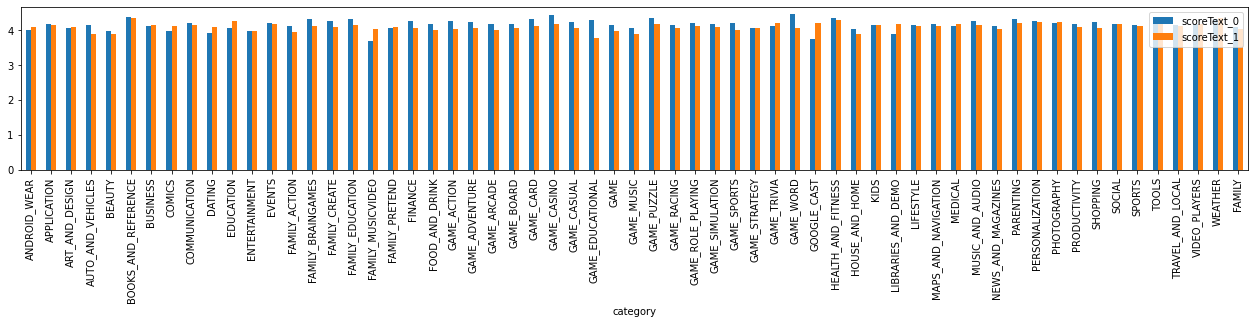

In [ ]:
plt.figure(figsize=(22, 6))
avgRating.plot(x = 'category', y = ['scoreText_0','scoreText_1'],kind='bar',figsize=(22, 3));

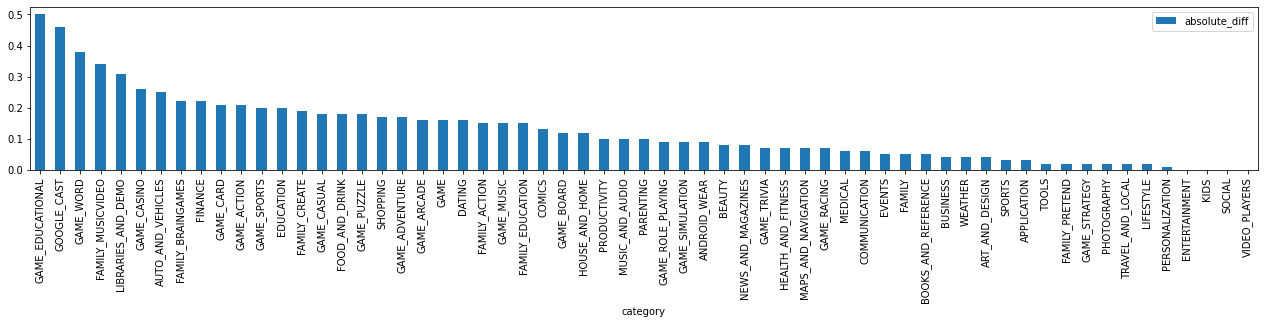

In [ ]:
avgRating.sort_values(by=['absolute_diff'], inplace=True,ascending=False)
avgRating.plot(x='category',y = ['absolute_diff'],kind = 'bar',figsize = (22,3))

In [ ]:
round(grp.get_group(0)['scoreText'].mean(),2)

4.19

In [ ]:
round(grp.get_group(1)['scoreText'].mean(),2)

4.11

In [ ]:
# communities = list(community.k_clique_communities(G, 4)) # session crashed insufficient ram

In [ ]:
grp  = nodes.groupby(['greedy_communities'])

In [ ]:
grp.groups.keys()

dict_keys([0, 1, 2, 3])

In [ ]:
grp.size()

greedy_communities
0    6017
1    5432
2       2
3       2
dtype: int64

In [ ]:
nodes.iloc[list(grp.groups[2])]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities
6496,Professional Soccer Betting Tips,com.winningbettingtipsfree,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/fRoN-M7P...,Betting Tips Analyst,Betting+Tips+Analyst,FREE,0.0,True,We are at your service to give you consistent ...,4.4,4.45,NaN,SPORTS,1,0,2,28,0.0,0
9291,Virtual Sports Betting Prediction Game - Kupon...,com.goygoy.kuponstar,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/Ex59Iojl...,GoyGoy Yazılım,GoyGoy+Yaz%C4%B1l%C4%B1m,FREE,0.0,True,Virtual sport betting prediction game. No real...,4.2,4.18,NaN,GAME_ACTION,0,0,2,6,0.0,0


In [ ]:
nodes.iloc[list(grp.groups[3])]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities
1213,Chat America,chatamerica.net,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/G-FGhtvL...,leb5,leb5,FREE,0.0,True,Chat America is the best chat application in A...,3.9,3.936853,NaN,DATING,0,1,3,515,0.005,1
7759,Smart Card Maker Pro,com.shahabas.smartcardmakerpro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/dFMaZQ3U...,twise,4818827973213097682,FREE,0.0,True,The smarter way to create awesome cards!,3.0,2.980198,NaN,BUSINESS,0,0,3,120,0.001,1


In [ ]:
avgPrice = pd.DataFrame({'category': categories,'price_0':0.0,'price_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_0'] = round(df[df['category'] == cat]['price'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_1'] = round(df[df['category'] == cat]['price'].mean(),2)

In [ ]:
avgPrice['absolute_diff'] = abs(avgPrice['price_0']- avgPrice['price_1'])

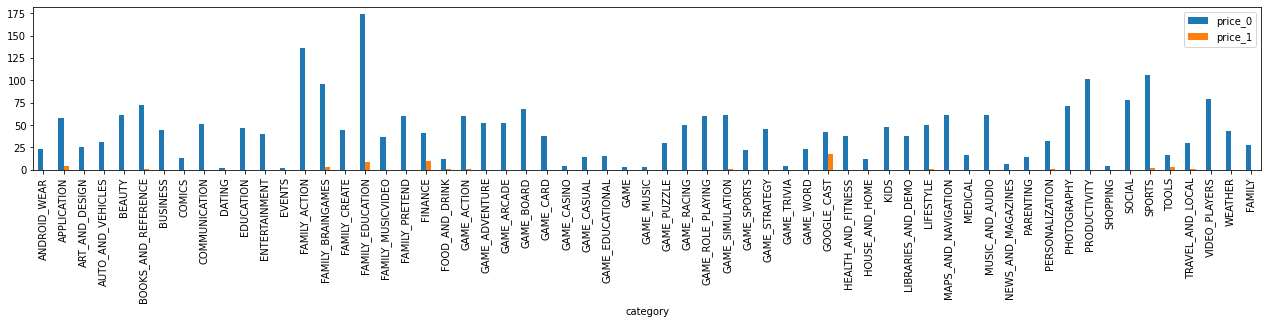

In [ ]:
avgPrice.plot(x = 'category', y = ['price_0','price_1'],kind='bar',figsize=(22, 3));

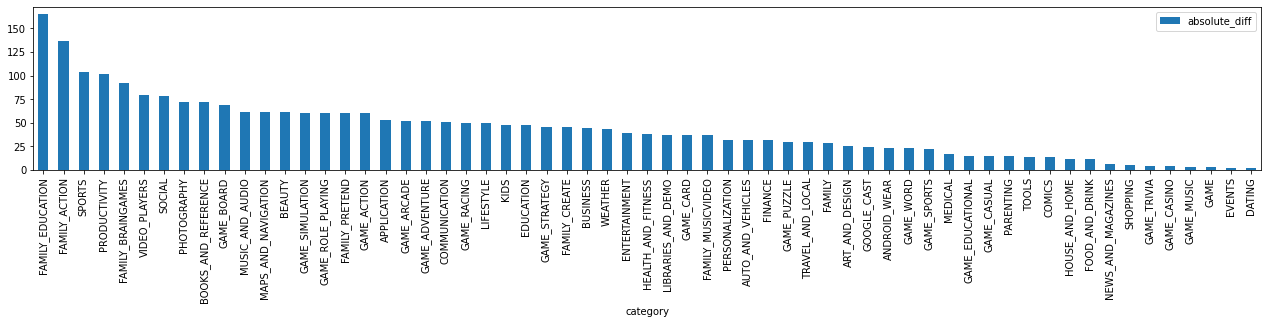

In [ ]:
avgPrice.sort_values(by=['absolute_diff'], inplace=True,ascending=False)
avgPrice.plot(x='category',y = ['absolute_diff'],kind = 'bar',figsize = (22,3))

In [ ]:
round(grp.get_group(0)['price'].mean(),2)

41.7

In [ ]:
round(grp.get_group(1)['price'].mean(),2)

0.95

In [ ]:
avgReviews = pd.DataFrame({'category': categories,'reviews_0':0.0,'reviews_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgReviews[avgReviews['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_0'] = round(df[df['category'] == cat]['degree'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgReviews[avgReviews['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_1'] = round(df[df['category'] == cat]['degree'].mean(),2)

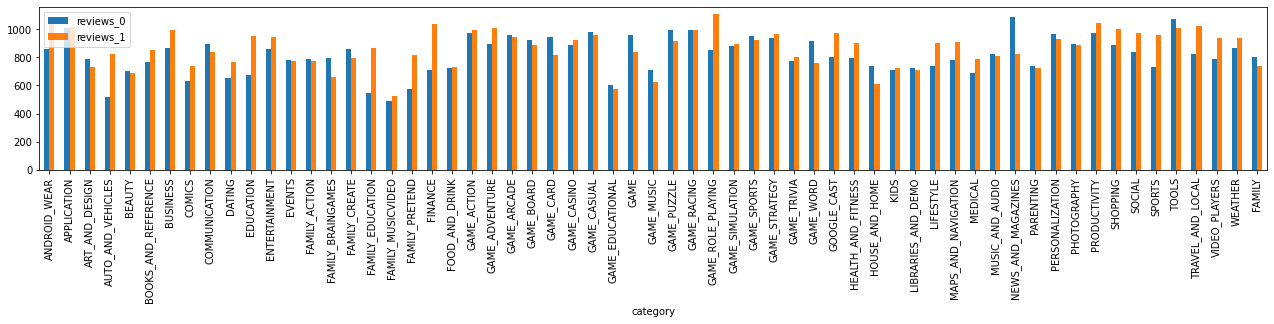

In [ ]:
avgReviews.plot(x = 'category', y = ['reviews_0','reviews_1'],kind='bar',figsize=(22, 3));

In [ ]:
round(grp.get_group(0)['degree'].mean(),2)

870.13

In [ ]:
round(grp.get_group(1)['degree'].mean(),2)

894.78

In [ ]:
trending = pd.DataFrame({'category': categories,'trending_0':0.0,'trending_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_0'] = sum(df[df['category'] == cat]['trending'])
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_1'] = sum(df[df['category'] == cat]['trending'])

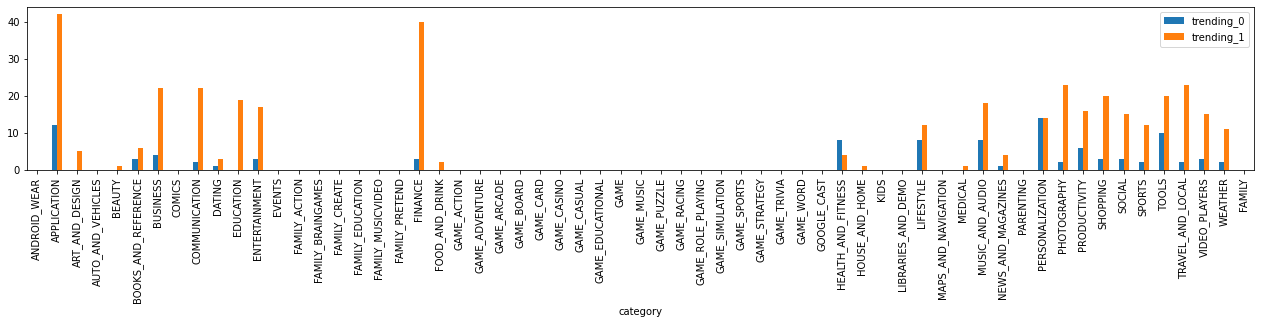

In [ ]:
trending.plot(x = 'category', y = ['trending_0','trending_1'],kind='bar',figsize=(22, 3));

# Louvain

In [ ]:
partition = community_louvain.best_partition(G) # 3m 10s

In [ ]:
nodes['louvain_communities'] = 0
for appId,value in partition.items():
  idx = list(nodes[nodes['appId'] ==  appId].index)[0]
  nodes.at[idx,'louvain_communities'] = value 

In [ ]:
nodes.to_csv('/content/gdrive/MyDrive/PlayStore Data/WIP/wip_nodes.csv',encoding = 'utf-8',index=False)

In [ ]:
nodes['louvain_communities'].unique()

array([1, 0, 2])

In [ ]:
grp = nodes.groupby(['louvain_communities'])

In [ ]:
grp.size()

louvain_communities
0    4329
1    6114
2    1010
dtype: int64

In [ ]:
avgRating = pd.DataFrame({'category': categories,'scoreText_0':0.0,'scoreText_1':0.0, 'scoreText_2': 0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_0'] = round(df[df['category'] == cat]['scoreText'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_1'] = round(df[df['category'] == cat]['scoreText'].mean(),2)

# community 2
df = grp.get_group(2)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_2'] = round(df[df['category'] == cat]['scoreText'].mean(),2)
  

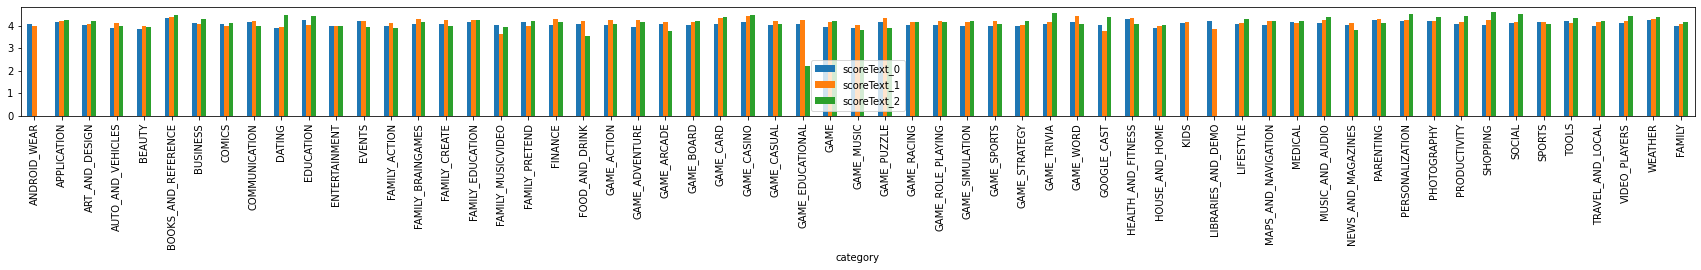

In [ ]:
avgRating.plot(x = 'category', y = ['scoreText_0','scoreText_1','scoreText_2'],kind='bar',figsize=(30, 2));

In [ ]:
round(grp.get_group(0)['scoreText'].mean(),2),round(grp.get_group(1)['scoreText'].mean(),2),round(grp.get_group(2)['scoreText'].mean(),2)

(4.09, 4.19, 4.19)

In [ ]:
avgPrice = pd.DataFrame({'category': categories,'price_0':0.0,'price_1':0.0,'price_2':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_0'] = round(df[df['category'] == cat]['price'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_1'] = round(df[df['category'] == cat]['price'].mean(),2)
    
# community 2
df = grp.get_group(2)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_2'] = round(df[df['category'] == cat]['price'].mean(),2)

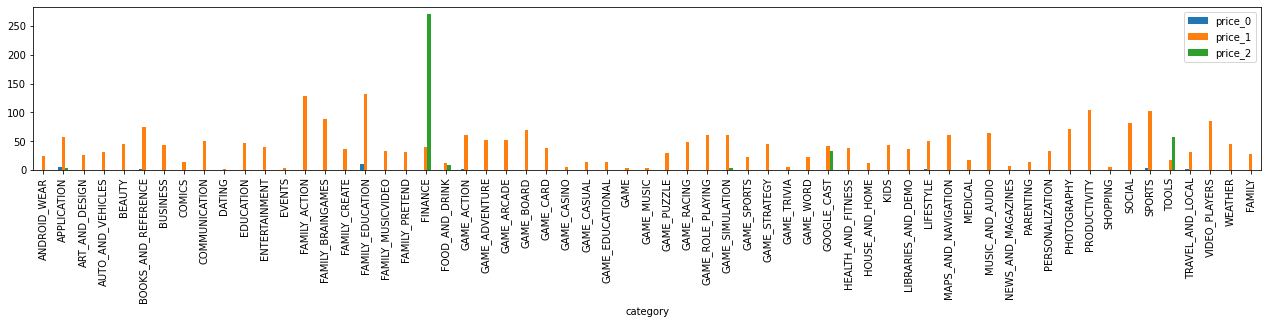

In [ ]:
avgPrice.plot(x = 'category', y = ['price_0','price_1','price_2'],kind='bar',figsize=(22, 3));

In [ ]:
round(grp.get_group(0)['price'].mean(),2), round(grp.get_group(1)['price'].mean(),2), round(grp.get_group(2)['price'].mean(),2)

(0.49, 41.09, 2.72)

In [ ]:
df0 = grp.get_group(0)
df1 = grp.get_group(1)
df2 = grp.get_group(2)
print(len(df0[df0['category'] == 'FINANCE']), len(df1[df1['category'] == 'FINANCE']),len(df2[df2['category'] == 'FINANCE']) )
print(len(df0[(df0['category'] == 'FINANCE') & (df0['priceText'] == 'FREE')]), len(df1[(df1['category'] == 'FINANCE') & (df1['priceText'] == 'FREE')]), len(df2[(df2['category'] == 'FINANCE') & (df2['priceText'] == 'FREE')]))

185 62 7
185 52 4


In [ ]:
df0 = grp.get_group(0)
df1 = grp.get_group(1)
df2 = grp.get_group(2)
print(len(df0[df0['category'] == 'TOOLS']), len(df1[df1['category'] == 'TOOLS']),len(df2[df2['category'] == 'TOOLS']) )
print(len(df0[(df0['category'] == 'TOOLS') & (df0['priceText'] == 'FREE')]), len(df1[(df1['category'] == 'TOOLS') & (df1['priceText'] == 'FREE')]), len(df2[(df2['category'] == 'TOOLS') & (df2['priceText'] == 'FREE')]))

109 64 6
109 54 4


In [ ]:
df2[(df2['category'] == 'TOOLS')]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
6685,"Smart Security - Phone Cleaner, Booster, Defender",com.smartsecurityxzt,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/AVWBHPPR...,Sourcery,Sourcery,FREE,0.0,True,Why do our users believe that Smart Security i...,4.4,4.412778,NaN,TOOLS,0,0,0,461,0.004,2,0
6718,Whats Tracker,com.itamazons.whatstracker,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/cL52ihSq...,ITamazons,ITamazons,FREE,0.0,True,Wanna know who viewed your WhatsApp profile? W...,4.1,4.070352,NaN,TOOLS,0,0,1,989,0.010,2,1
6726,Mobile Number Locator - On Live Map,in.mobilelocation.dad,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/dlmJVbFV...,Morounfolu,Morounfolu,FREE,0.0,True,Mobile Number Locator On Live Map using Phone...,4.2,4.199575,NaN,TOOLS,0,0,1,1544,0.015,2,1
6734,"QuickClick Pro - Auto Clicker, Click Assistant",com.appoceaninc.autoclickertapper,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/BvUcam_K...,App Ocean Inc,9098555508440962357,₹25.00,25.0,False,QuickClick does NOT require root and works on ...,4.7,4.735043,₹,TOOLS,0,0,1,512,0.005,2,1
6737,Hot VPN Pro - HAM Paid VPN Private Network,com.hot_vpn.hero_vpn_pro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/TMxV1wJS...,VpnHot.inc,VpnHot.inc,₹320.00,320.0,False,"Hot VPN - HAM Paid VPN no logging, no reason t...",4.3,4.266892,₹,TOOLS,0,0,1,1511,0.014,2,1
6742,"Deleted video recovery: Photos, Data recovery",com.delete.photo.recovery.deleted.video.recove...,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/mqXHqN_i...,Appstark Tech,Appstark+Tech,FREE,0.0,True,A data recovery App help you recover deleted p...,4.3,4.286225,NaN,TOOLS,0,1,1,1440,0.014,2,1


In [ ]:
df2[(df2['category'] == 'FINANCE')]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
1988,BitFunds - Crypto Cloud Mining,com.task.cryptocloudpro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/zwSelDj6...,BitFundsLtd,BitFundsLtd,₹470.00,470.0,False,Do you want to earn more money? Start mining c...,3.2,3.224511,₹,FINANCE,1,0,1,1360,0.013,2,1
1989,Multimine - BTC Cloud Mining,com.task.multimine,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/GYgFEqdr...,Multimine BTC LTD,8187108852642038766,₹700.00,700.0,False,Start cloud mining with Multimine and earn BTC...,3.5,3.537239,₹,FINANCE,1,0,1,852,0.008,2,0
1995,Forex Signals - Daily Live Buy/Sell,st.liveforexsignals,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/v7qMZ7K8...,Massy Art,6455642959287697303,FREE,0.0,True,You can achieved daily 100+ Pips profit with F...,4.4,4.363370,NaN,FINANCE,1,0,1,279,0.003,2,0
1998,Forex Trading Signals - Forex Signals Trading ...,com.hipstertrader.app,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/_JwDBF62...,marketing66,6214507680680154683,FREE,0.0,True,Online Trading - Free Forex Trading Signals - ...,4.5,4.477778,NaN,FINANCE,1,0,1,1517,0.015,2,1
2010,Forex Alert - Notification & Bitcoin/Crypto Al...,com.funfungames.forexalarm,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/IO1lTY1h...,Finance Tool,Finance+Tool,FREE,0.0,True,Compact app to receive forex/crypto quote and ...,4.1,4.148515,NaN,FINANCE,1,0,1,530,0.005,2,1
2124,Airdrop - Claim Daily Bitcoin Airdrop,com.airdrop.mining.app,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/I81RtSf1...,Airdrop PVT LTD.,Airdrop+PVT+LTD.,₹720.00,720.0,False,Download the app now and claim daily bitcoins ...,4.8,4.822034,₹,FINANCE,0,0,1,761,0.008,2,1
8894,"Cowrywise: Online Savings, Finance & Mutual Funds",com.cowrywise.android,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/cKTUX8SK...,Cowrywise,8393279248480595794,FREE,0.0,True,The only wealth management app you really need...,4.6,4.592784,NaN,FINANCE,0,0,1,194,0.002,2,0


In [ ]:
avgReviews = pd.DataFrame({'category': categories,'reviews_0':0.0,'reviews_1':0.0,'reviews_2':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgReviews[avgReviews['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_0'] = round(df[df['category'] == cat]['degree'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgReviews[avgPrice['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_1'] = round(df[df['category'] == cat]['degree'].mean(),2)
    
# community 2
df = grp.get_group(2)
for cat in categories:
  idx = list(avgReviews[avgPrice['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_2'] = round(df[df['category'] == cat]['degree'].mean(),2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


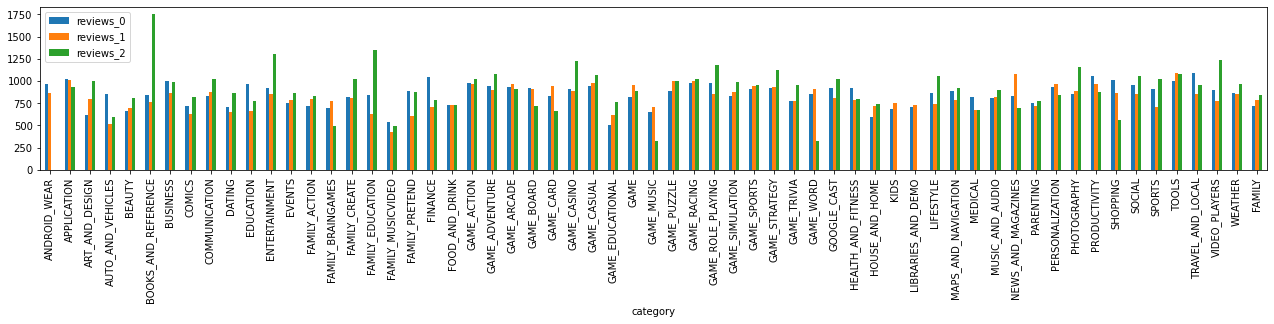

In [ ]:
avgReviews.plot(x = 'category', y = ['reviews_0','reviews_1','reviews_2'],kind='bar',figsize=(22, 3));

In [ ]:
trending = pd.DataFrame({'category': categories,'trending_0':0.0,'trending_1':0.0,'trending_2':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_0'] = sum(df[df['category'] == cat]['trending'])
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_1'] = sum(df[df['category'] == cat]['trending'])

# community 2
df = grp.get_group(2)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_2'] = sum(df[df['category'] == cat]['trending'])

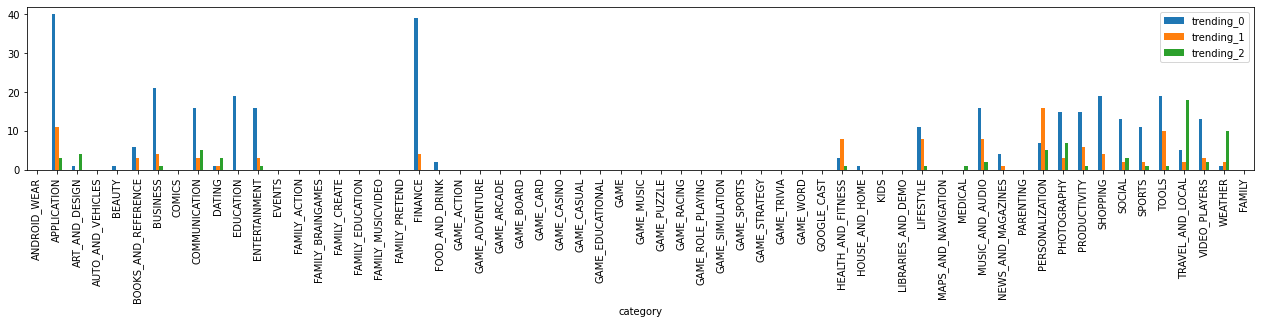

In [ ]:
trending.plot(x = 'category', y = ['trending_0','trending_1','trending_2'],kind='bar',figsize=(22, 3));

# InfoMap

In [ ]:
%%capture
!pip install infomap

In [ ]:
import infomap

In [ ]:
# find communities with infomap
H = nx.convert_node_labels_to_integers(G,label_attribute="appId")

In [ ]:
infomapX = infomap.Infomap("--two-level")
print("Building Infomap network from a NetworkX graph...")
for e in H.edges():
  infomapX.addLink(e[0],e[1])
print("Done")

Building Infomap network from a NetworkX graph...
Done


In [ ]:
print("Find communities with Infomap...")
infomapX.run();
print("Done")

Find communities with Infomap...
Done


In [ ]:
communities = {}
for node in infomapX.iterLeafNodes():
  communities[node.physicalId] = node.moduleIndex()

In [ ]:
nx.set_node_attributes(H, values=communities, name='community')

In [ ]:
nodes['infomap_communities'] = 0
for node in H.nodes:
  appId = H.nodes[node]['appId']
  idx = list(nodes[nodes['appId'] ==  appId].index)[0]
  value = H.nodes[node]['community']
  nodes.at[idx,'infomap_communities'] = value

In [ ]:
nodes.to_csv('/content/gdrive/MyDrive/PlayStore Data/WIP/wip_nodes.csv',encoding = 'utf-8',index=False)

In [ ]:
nodes['infomap_communities'].unique()

array([0, 1, 2])

In [ ]:
grp  = nodes.groupby(['infomap_communities'])

In [ ]:
grp.size()

infomap_communities
0    10531
1      920
2        2
dtype: int64

In [ ]:
nodes.iloc[list(grp.groups[2])]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
10877,MA Notes: Medical Assistant's Pocket Guide,com.medpresso.Lonestar.manotes,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/4JlE1L9y...,Skyscape Medpresso Inc,8951910663104444856,FREE,0.0,True,MA Notes: Medical Assistant's Pocket Guide,4.6,4.600000,NaN,MEDICAL,0,0,0,5,0.0,1,2
10926,Certified Medical Assistant Study Notes Lite,com.tutioncentral.cmanoteslite,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/k7W15hEB...,Vapari Systems,5079879671770467624,FREE,0.0,True,Collection of 600 study notes for the CMA Medi...,4.6,4.571429,NaN,MEDICAL,0,0,0,5,0.0,1,2


In [ ]:
avgRating = pd.DataFrame({'category': categories,'scoreText_0':0.0,'scoreText_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_0'] = round(df[df['category'] == cat]['scoreText'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgRating[avgRating['category'] == cat].index)[0]
  avgRating.at[idx,'scoreText_1'] = round(df[df['category'] == cat]['scoreText'].mean(),2)

<Figure size 1584x432 with 0 Axes>

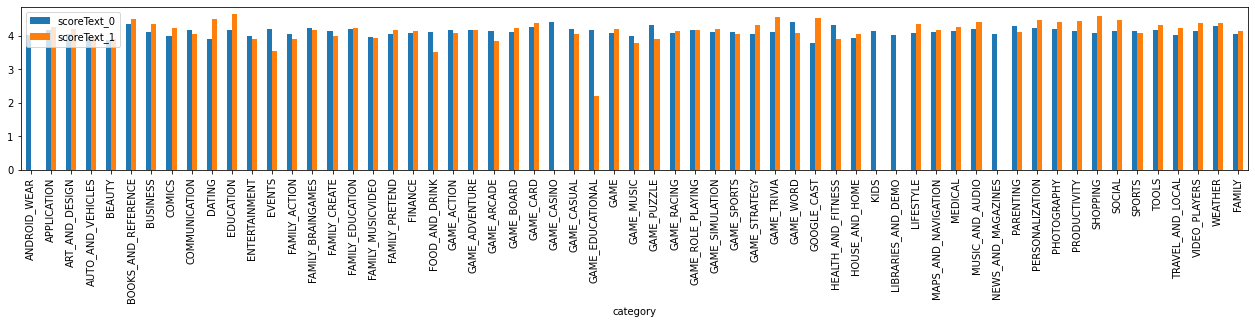

In [ ]:
plt.figure(figsize=(22, 6))
avgRating.plot(x = 'category', y = ['scoreText_0','scoreText_1'],kind='bar',figsize=(22, 3));

In [ ]:
df = grp.get_group(1)

In [ ]:
cat_not_in_grp1 = []
for cat in categories:
  if(len(df[df['category'] == cat]) == 0):
    cat_not_in_grp1.append(cat)

In [ ]:
print(len(cat_not_in_grp1))
cat_not_in_grp1

5


['ANDROID_WEAR',
 'GAME_CASINO',
 'KIDS',
 'LIBRARIES_AND_DEMO',
 'NEWS_AND_MAGAZINES']

In [ ]:
round(grp.get_group(0)['scoreText'].mean(),2)

4.15

In [ ]:
round(grp.get_group(1)['scoreText'].mean(),2)

4.2

In [ ]:
avgPrice = pd.DataFrame({'category': categories,'price_0':0.0,'price_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_0'] = round(df[df['category'] == cat]['price'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgPrice[avgPrice['category'] == cat].index)[0]
  avgPrice.at[idx,'price_1'] = round(df[df['category'] == cat]['price'].mean(),2)

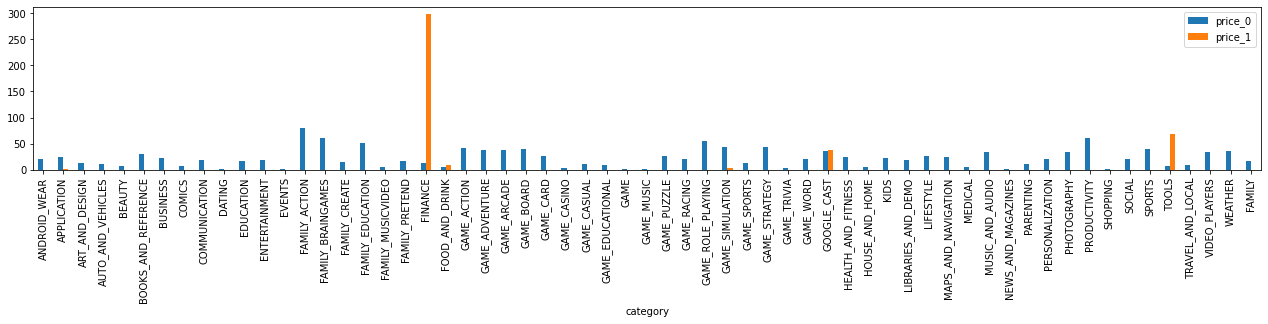

In [ ]:
avgPrice.plot(x = 'category', y = ['price_0','price_1'],kind='bar',figsize=(22, 3));

In [ ]:
round(grp.get_group(0)['price'].mean(),2)

24.13

In [ ]:
round(grp.get_group(1)['price'].mean(),2)

2.22

In [ ]:
df0 = grp.get_group(0)
df1 = grp.get_group(1)
print(len(df0[df0['category'] == 'FINANCE']), len(df1[df1['category'] == 'FINANCE']))
print(len(df0[(df0['category'] == 'FINANCE') & (df0['priceText'] == 'FREE')]), len(df1[(df1['category'] == 'FINANCE') & (df1['priceText'] == 'FREE')]))

250 4
239 2


In [ ]:
df1[(df1['category'] == 'FINANCE')]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
1988,BitFunds - Crypto Cloud Mining,com.task.cryptocloudpro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/zwSelDj6...,BitFundsLtd,BitFundsLtd,₹470.00,470.0,False,Do you want to earn more money? Start mining c...,3.2,3.224511,₹,FINANCE,1,0,1,1360,0.013,2,1
1998,Forex Trading Signals - Forex Signals Trading ...,com.hipstertrader.app,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/_JwDBF62...,marketing66,6214507680680154683,FREE,0.0,True,Online Trading - Free Forex Trading Signals - ...,4.5,4.477778,NaN,FINANCE,1,0,1,1517,0.015,2,1
2010,Forex Alert - Notification & Bitcoin/Crypto Al...,com.funfungames.forexalarm,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/IO1lTY1h...,Finance Tool,Finance+Tool,FREE,0.0,True,Compact app to receive forex/crypto quote and ...,4.1,4.148515,NaN,FINANCE,1,0,1,530,0.005,2,1
2124,Airdrop - Claim Daily Bitcoin Airdrop,com.airdrop.mining.app,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/I81RtSf1...,Airdrop PVT LTD.,Airdrop+PVT+LTD.,₹720.00,720.0,False,Download the app now and claim daily bitcoins ...,4.8,4.822034,₹,FINANCE,0,0,1,761,0.008,2,1


In [ ]:
nodes[nodes['price'] == max(nodes['price'])]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
8044,Learn English Sentence Master Pro,com.masterkeygames.sentencemasterpro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/QFRwq5Ww...,MasterKey Games,MasterKey+Games,₹950.00,950.0,False,English word game to learn English and have fu...,4.5,4.480000,₹,COMMUNICATION,0,0,0,277,0.003,1,0
8644,"Tapatalk Pro - 200,000+ Forums",com.quoord.tapatalkHD,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/0EFzXFSO...,Tapatalk Inc.,Tapatalk+Inc.,₹950.00,950.0,False,Tapatalk Pro delivers online forums in a stre...,3.1,3.115656,₹,FAMILY,0,0,0,1352,0.013,1,0
9540,RAYCRISIS,jp.co.taito.raycrisis,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/5_G9hWUA...,TAITO Corporation,TAITO+Corporation,₹950.00,950.0,False,Full porting of the last work of the Ray Serie...,4.0,3.980000,₹,GAME_ARCADE,0,0,0,44,0.000,1,0


In [ ]:
print(len(df0[df0['category'] == 'TOOLS']), len(df1[df1['category'] == 'TOOLS']))
print(len(df0[(df0['category'] == 'TOOLS') & (df0['priceText'] == 'FREE')]), len(df1[(df1['category'] == 'TOOLS') & (df1['priceText'] == 'FREE')]))

174 5
164 3


In [ ]:
df1[(df1['category'] == 'TOOLS')]

,title,appId,url,icon,developer,developerId,priceText,price,free,summary,scoreText,score,currency,category,grossing,trending,greedy_communities,degree,eigenvector_centrality,louvain_communities,infomap_communities
6718,Whats Tracker,com.itamazons.whatstracker,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/cL52ihSq...,ITamazons,ITamazons,FREE,0.0,True,Wanna know who viewed your WhatsApp profile? W...,4.1,4.070352,NaN,TOOLS,0,0,1,989,0.010,2,1
6726,Mobile Number Locator - On Live Map,in.mobilelocation.dad,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/dlmJVbFV...,Morounfolu,Morounfolu,FREE,0.0,True,Mobile Number Locator On Live Map using Phone...,4.2,4.199575,NaN,TOOLS,0,0,1,1544,0.015,2,1
6734,"QuickClick Pro - Auto Clicker, Click Assistant",com.appoceaninc.autoclickertapper,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/BvUcam_K...,App Ocean Inc,9098555508440962357,₹25.00,25.0,False,QuickClick does NOT require root and works on ...,4.7,4.735043,₹,TOOLS,0,0,1,512,0.005,2,1
6737,Hot VPN Pro - HAM Paid VPN Private Network,com.hot_vpn.hero_vpn_pro,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/TMxV1wJS...,VpnHot.inc,VpnHot.inc,₹320.00,320.0,False,"Hot VPN - HAM Paid VPN no logging, no reason t...",4.3,4.266892,₹,TOOLS,0,0,1,1511,0.014,2,1
6742,"Deleted video recovery: Photos, Data recovery",com.delete.photo.recovery.deleted.video.recove...,https://play.google.com/store/apps/details?id=...,https://play-lh.googleusercontent.com/mqXHqN_i...,Appstark Tech,Appstark+Tech,FREE,0.0,True,A data recovery App help you recover deleted p...,4.3,4.286225,NaN,TOOLS,0,1,1,1440,0.014,2,1


In [ ]:
avgReviews = pd.DataFrame({'category': categories,'reviews_0':0.0,'reviews_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(avgReviews[avgReviews['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_0'] = round(df[df['category'] == cat]['degree'].mean(),2)
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(avgReviews[avgReviews['category'] == cat].index)[0]
  avgReviews.at[idx,'reviews_1'] = round(df[df['category'] == cat]['degree'].mean(),2)

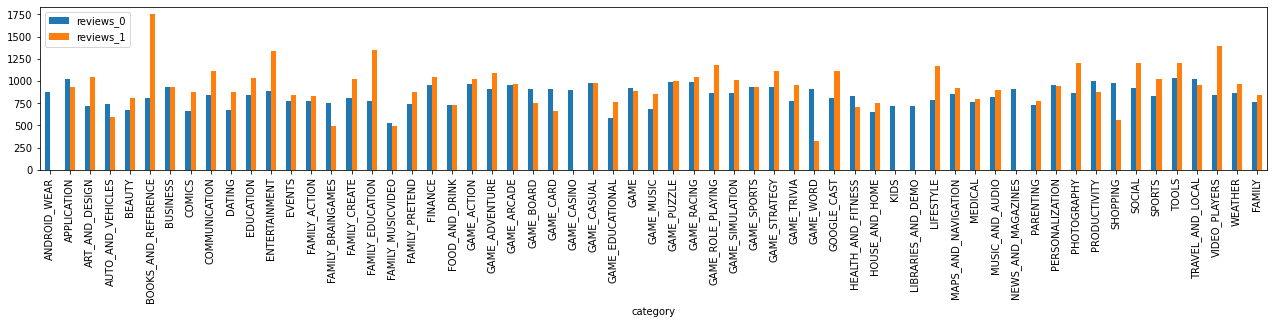

In [ ]:
avgReviews.plot(x = 'category', y = ['reviews_0','reviews_1'],kind='bar',figsize=(22, 3));

In [ ]:
round(grp.get_group(0)['degree'].mean(),2)

873.24

In [ ]:
round(grp.get_group(1)['degree'].mean(),2)

978.9

In [ ]:
trending = pd.DataFrame({'category': categories,'trending_0':0.0,'trending_1':0.0})

# community 0
df = grp.get_group(0)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_0'] = sum(df[df['category'] == cat]['trending'])
  
# community 1
df = grp.get_group(1)
for cat in categories:
  idx = list(trending[trending['category'] == cat].index)[0]
  trending.at[idx,'trending_1'] = sum(df[df['category'] == cat]['trending'])

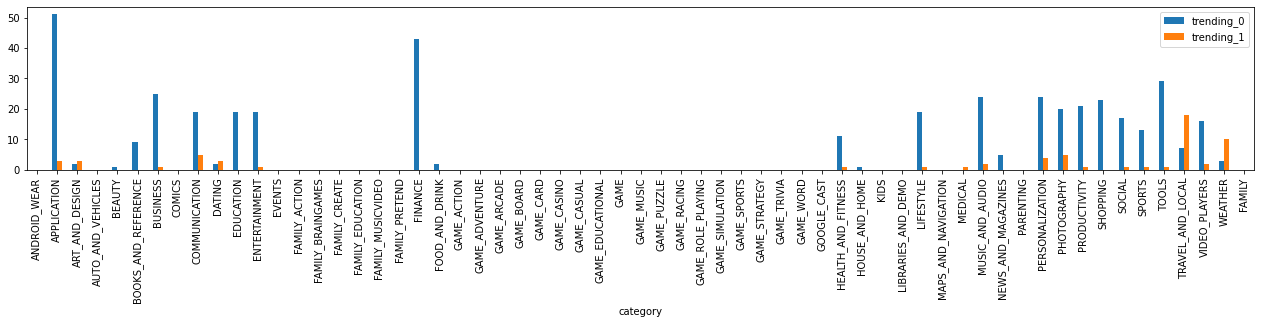

In [ ]:
trending.plot(x = 'category', y = ['trending_0','trending_1'],kind='bar',figsize=(22, 3));

## Comparison

In [ ]:
grps = {
  'cnm': nodes.groupby(['greedy_communities']),
  'louvain': nodes.groupby(['louvain_communities']),
  'infomap': nodes.groupby(['infomap_communities'])
}

In [ ]:
plt.figure(figsize=(8, 6)) 
plt.plot(degrees, degree_freq,'o',markersize = 1) 
plt.xlabel('Degree')
plt.ylabel('Frequency')

{'cnm': 'asd'}

[6017, 5432, 2, 2]
[6114, 4329, 1010, 0]
[10531, 920, 2, 0]


Text(0.5, 1.0, 'Communtiy Sizes')

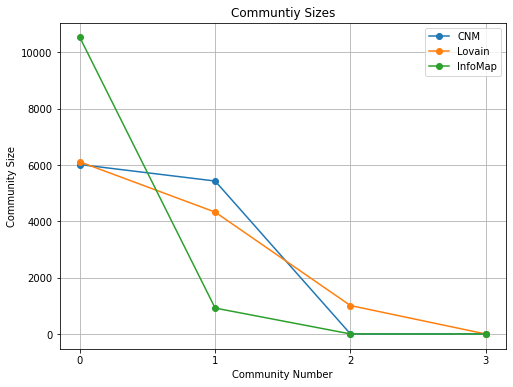

In [ ]:
# cluster sizes
plt.figure(figsize=(8, 6)) 
plt.xticks([0,1,2,3])
for key, grp in grps.items():
  l = list(grp.size())
  l.sort(reverse=True)
  l.extend([0]*(4 - len(l)))
  print(l)
  plt.grid()
  plt.plot([0,1,2,3] ,l ,marker='o') 
plt.xlabel('Community Number')
plt.ylabel('Community Size')
plt.legend(['CNM','Lovain','InfoMap'])
plt.title("Communtiy Sizes")

[4.19, 4.11, 4.3, 3.45]
[4.19, 4.09, 4.19, 0]
[4.15, 4.2, 4.6, 0]


Text(0.5, 1.0, 'Average Rating')

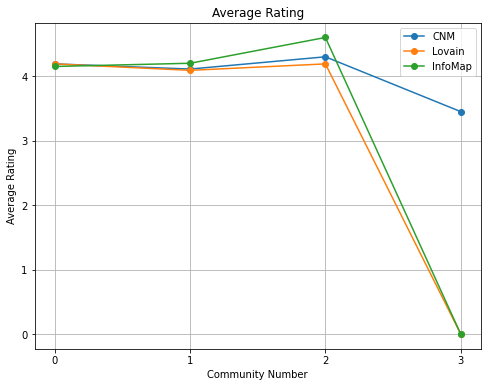

In [ ]:
plt.figure(figsize=(8, 6)) 
plt.grid()
plt.xticks([0,1,2,3])
for key, grp in grps.items(): # cnm, louvain, infomap
  avgRating = []
  for name, group in grp:
    avgRating.append((len(group),round(group['scoreText'].mean(),2)))
  avgRating.sort(reverse=True)
  l = [ i[1] for i in avgRating]
  l.extend([0]*(4 - len(l)))
  print(l)
  plt.plot([0,1,2,3] ,l ,marker='o')
plt.xlabel('Community Number')
plt.ylabel('Average Rating')
plt.legend(['CNM','Lovain','InfoMap'])
plt.title("Average Rating")

[41.7, 0.95, 0.0, 0.0]
[41.09, 0.49, 2.72, 0]
[24.13, 2.22, 0.0, 0]


Text(0.5, 1.0, 'Average Price per Community')

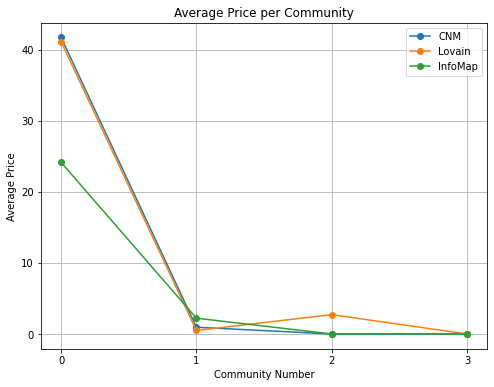

In [ ]:
plt.figure(figsize=(8, 6)) 
plt.grid()
plt.xticks([0,1,2,3])
for key, grp in grps.items(): # cnm, louvain, infomap
  avgPrice = []
  for name, group in grp:
    avgPrice.append((len(group),round(group['price'].mean(),2)))
  avgPrice.sort(reverse=True)
  l = [ i[1] for i in avgPrice]
  l.extend([0]*(4 - len(l)))
  print(l)
  plt.plot([0,1,2,3] ,l ,marker='o')
plt.xlabel('Community Number')
plt.ylabel('Average Price')
plt.legend(['CNM','Lovain','InfoMap'])
plt.title("Average Price per Community")

[870.13, 894.78, 317.5, 17.0]
[866.54, 884.72, 959.11, 0]
[873.24, 978.9, 5.0, 0]


Text(0.5, 1.0, 'Average Reviews per Community')

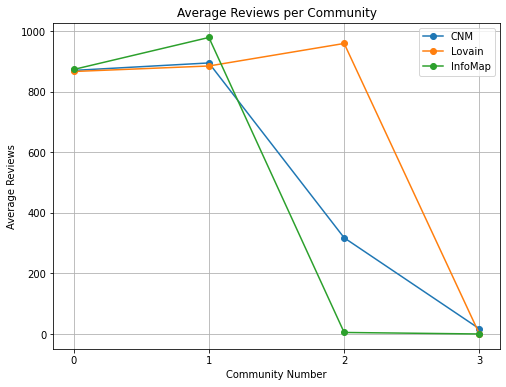

In [ ]:
plt.figure(figsize=(8, 6)) 
plt.grid()
plt.xticks([0,1,2,3])
for key, grp in grps.items(): # cnm, louvain, infomap
  avgReviews= []
  for name, group in grp:
    avgReviews.append((len(group),round(group['degree'].mean(),2)))
  avgReviews.sort(reverse=True)
  l = [ i[1] for i in avgReviews]
  l.extend([0]*(4 - len(l)))
  print(l)
  plt.plot([0,1,2,3] ,l ,marker='o')
plt.xlabel('Community Number')
plt.ylabel('Average Reviews')
plt.legend(['CNM','Lovain','InfoMap'])
plt.title("Average Reviews per Community")

In [ ]:
df = nodes[['degree','eigenvector_centrality']]

In [ ]:
df.corr()

,degree,eigenvector_centrality
degree,1.000000,0.992394
eigenvector_centrality,0.992394,1.000000
